Excerise 1

In [2]:
from sklearn import preprocessing
from sklearn.tree import DecisionTreeClassifier

In [3]:
Outlook = ['Rainy', 'Rainy', 'Overcast', 'Sunny', 'Sunny', 'Sunny','Overcast',

'Rainy', 'Rainy', 'Sunny', 'Rainy','Overcast', 'Overcast','Sunny']
Temperature = ['Hot', 'Hot', 'Hot', 'Mild', 'Cool', 'Cool', 'Cool',
'Mild', 'Cool', 'Mild', 'Mild', 'Mild', 'Hot', 'Mild']
Humidity = ['High', 'High', 'High', 'High', 'Normal', 'Normal', 'Normal',
'High', 'Normal', 'Normal', 'Normal', 'High', 'Normal','High']
Wind = ['False', 'True', 'False', 'False', 'False', 'True', 'True',
'False', 'False', 'False', 'True', 'True', 'False', 'True']

#Class Label:
Play = ['No', 'No', 'Yes', 'Yes', 'Yes', 'No', 'Yes', 'No',
'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'No']

In [4]:
#creating labelEncoder
le = preprocessing.LabelEncoder()
# Converting string labels into numbers.
Outlook_encoded = le.fit_transform(Outlook)
Outlook_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print("Outllok mapping:",Outlook_name_mapping)
Temperature_encoded = le.fit_transform(Temperature)
Temperature_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print("Temperature mapping:",Temperature_name_mapping)
Humidity_encoded = le.fit_transform(Humidity)
Humidity_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print("Humidity mapping:",Humidity_name_mapping)
Wind_encoded = le.fit_transform(Wind)
Wind_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print("Wind mapping:",Wind_name_mapping)
Play_encoded = le.fit_transform(Play)
Play_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print("Play mapping:",Play_name_mapping)
print("\n\n")
print("Weather:" ,Outlook_encoded)
print("Temerature:" ,Temperature_encoded)
print("Humidity:" ,Humidity_encoded)
print("Wind:" ,Wind_encoded)
print("Play:" ,Play_encoded)
dataset = tuple(zip(Outlook_encoded,Temperature_encoded,Humidity_encoded,Wind_encoded))
print(dataset)

Outllok mapping: {'Overcast': 0, 'Rainy': 1, 'Sunny': 2}
Temperature mapping: {'Cool': 0, 'Hot': 1, 'Mild': 2}
Humidity mapping: {'High': 0, 'Normal': 1}
Wind mapping: {'False': 0, 'True': 1}
Play mapping: {'No': 0, 'Yes': 1}



Weather: [1 1 0 2 2 2 0 1 1 2 1 0 0 2]
Temerature: [1 1 1 2 0 0 0 2 0 2 2 2 1 2]
Humidity: [0 0 0 0 1 1 1 0 1 1 1 0 1 0]
Wind: [0 1 0 0 0 1 1 0 0 0 1 1 0 1]
Play: [0 0 1 1 1 0 1 0 1 1 1 1 1 0]
((1, 1, 0, 0), (1, 1, 0, 1), (0, 1, 0, 0), (2, 2, 0, 0), (2, 0, 1, 0), (2, 0, 1, 1), (0, 0, 1, 1), (1, 2, 0, 0), (1, 0, 1, 0), (2, 2, 1, 0), (1, 2, 1, 1), (0, 2, 0, 1), (0, 1, 1, 0), (2, 2, 0, 1))


In [5]:
from sklearn.model_selection import train_test_split
#split data set into train and test sets
data_train, data_test,target_train,target_test= train_test_split(dataset,
Play_encoded, test_size = 0.05, random_state = 132)
print(data_train)

[(1, 1, 0, 0), (2, 2, 0, 0), (2, 0, 1, 0), (1, 2, 0, 0), (0, 1, 1, 0), (2, 2, 1, 0), (1, 0, 1, 0), (2, 0, 1, 1), (0, 0, 1, 1), (0, 1, 0, 0), (2, 2, 0, 1), (1, 2, 1, 1), (1, 1, 0, 1)]


In [6]:
clf_gini = DecisionTreeClassifier(criterion = "gini", random_state = 132,max_depth = 3, min_samples_leaf = 5)
clf_gini=clf_gini.fit(data_train,target_train)

In [7]:
prediction = clf_gini.predict(data_test)
print(prediction)

[0]


In [8]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

In [9]:
print("Confusion Matrix: ",confusion_matrix(target_test, prediction))
      
print ("Accuracy : ",accuracy_score(target_test,prediction)*100)

Confusion Matrix:  [[0 0]
 [1 0]]
Accuracy :  0.0


In [10]:
from sklearn.tree import export_graphviz
export_graphviz(clf_gini,out_file='w_tree.dot',feature_names=['outlook','temperature','humidity','wind'],class_names=['do_not_play','play'], filled=True)
from subprocess import call
call(['dot', '-Tpng', 'w_tree.dot', '-o', 'w_tree.png', '-Gdpi=600'])

0

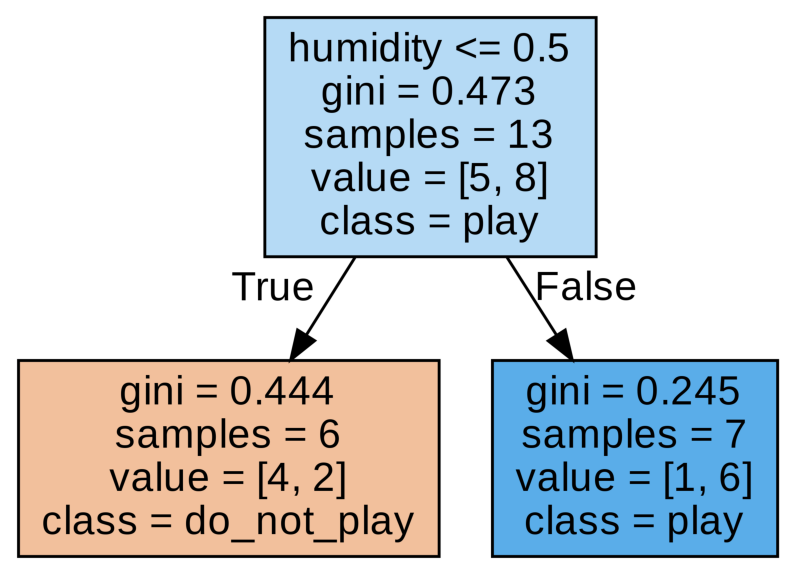

In [11]:
import matplotlib.pyplot as plt
plt.figure(figsize = (14, 18))
plt.imshow(plt.imread('w_tree.png'))
plt.axis('off')
plt.show()

In [12]:
#Import scikit-learn dataset library
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier
import pandas as pd
import numpy as np
#Load dataset
iris = datasets.load_iris()

In [13]:
# print the names of the 13 features
print("Features: ", iris.feature_names)
# print the label type of wine(class_0, class_1, class_2)
print("Labels: ", iris.target_names)
# print data(feature)shape
iris.data.shape

Features:  ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Labels:  ['setosa' 'versicolor' 'virginica']


(150, 4)

In [14]:
from sklearn.model_selection import train_test_split
#split data set into train and test sets
data_train, data_test,target_train,target_test= train_test_split(iris.data,
iris.target, test_size = 0.20, random_state = 132)

In [15]:
#Create a Decision Tree Classifier (using Gini)
clf_gini = DecisionTreeClassifier(criterion = "gini",random_state = 132,max_depth=3, min_samples_leaf=5)

#Train the model using the training sets
clf_gini=clf_gini.fit(data_train,target_train)

In [16]:
# Predict the classes of test data
prediction = clf_gini.predict(data_test)
print(prediction)

[2 1 2 0 2 2 0 1 2 1 1 1 0 2 1 1 1 0 1 0 0 2 2 0 1 1 2 1 1 0]


In [17]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

In [18]:
print("Confusion Matrix: ",confusion_matrix(target_test, prediction))
      
print ("Accuracy : ",accuracy_score(target_test,prediction)*100)

Confusion Matrix:  [[ 8  0  0]
 [ 0 11  3]
 [ 0  2  6]]
Accuracy :  83.33333333333334


In [19]:
from sklearn import metrics

print(metrics.classification_report(target_test, prediction))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           1       0.85      0.79      0.81        14
           2       0.67      0.75      0.71         8

    accuracy                           0.83        30
   macro avg       0.84      0.85      0.84        30
weighted avg       0.84      0.83      0.84        30



In [20]:
from sklearn.tree import export_graphviz
export_graphviz(clf_gini,out_file='iris_tree.dot',feature_names=list(iris.feature_names),class_names=list(iris.target_names), filled=True)
from subprocess import call
call(['dot', '-Tpng', 'iris_tree.dot', '-o', 'iris_tree.png', '-Gdpi=600'])

0

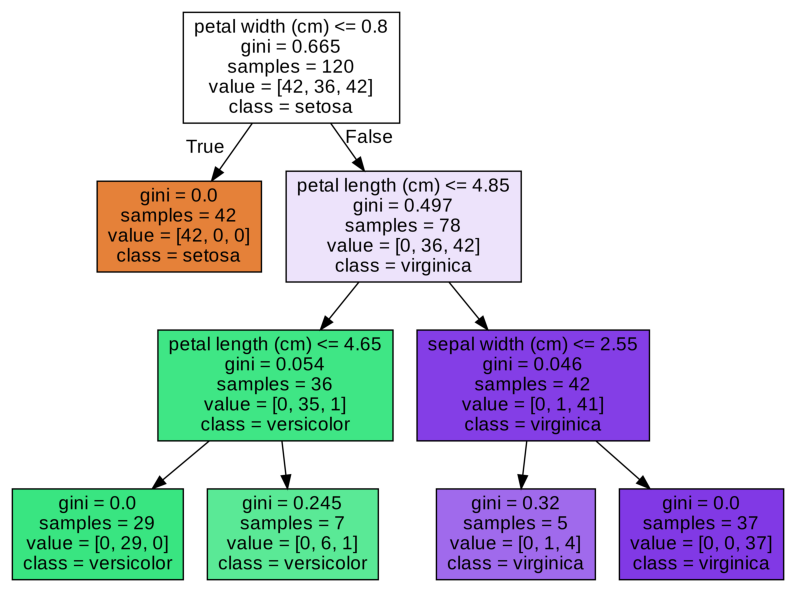

In [21]:
# Display in python
import matplotlib.pyplot as plt
plt.figure(figsize = (14, 18))
plt.imshow(plt.imread('iris_tree.png'))
plt.axis('off')
plt.show()

Excerise 2

In [22]:
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier
import pandas as pd
import numpy as np
#Load dataset
wine=datasets.load_wine()
print(wine)

{'data': array([[1.423e+01, 1.710e+00, 2.430e+00, ..., 1.040e+00, 3.920e+00,
        1.065e+03],
       [1.320e+01, 1.780e+00, 2.140e+00, ..., 1.050e+00, 3.400e+00,
        1.050e+03],
       [1.316e+01, 2.360e+00, 2.670e+00, ..., 1.030e+00, 3.170e+00,
        1.185e+03],
       ...,
       [1.327e+01, 4.280e+00, 2.260e+00, ..., 5.900e-01, 1.560e+00,
        8.350e+02],
       [1.317e+01, 2.590e+00, 2.370e+00, ..., 6.000e-01, 1.620e+00,
        8.400e+02],
       [1.413e+01, 4.100e+00, 2.740e+00, ..., 6.100e-01, 1.600e+00,
        5.600e+02]]), 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
 

In [23]:
# print the names of the 13 features
print("Features: ", wine.feature_names)
# print the label type of wine(class_0, class_1, class_2)
print("Labels: ", wine.target_names)
# print data(feature)shape
wine.data.shape

Features:  ['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']
Labels:  ['class_0' 'class_1' 'class_2']


(178, 13)

In [24]:
from sklearn.model_selection import train_test_split
#split data set into train and test sets
data_train, data_test,target_train,target_test= train_test_split(wine.data,
wine.target, test_size = 0.34, random_state = 132)
print(data_train)
print(data_test)
print(target_test)
print(target_train)

[[1.368e+01 1.830e+00 2.360e+00 ... 1.230e+00 2.870e+00 9.900e+02]
 [1.324e+01 2.590e+00 2.870e+00 ... 1.040e+00 2.930e+00 7.350e+02]
 [1.237e+01 1.630e+00 2.300e+00 ... 8.900e-01 2.780e+00 3.420e+02]
 ...
 [1.272e+01 1.810e+00 2.200e+00 ... 1.160e+00 3.140e+00 7.140e+02]
 [1.372e+01 1.430e+00 2.500e+00 ... 8.900e-01 2.870e+00 1.285e+03]
 [1.229e+01 1.410e+00 1.980e+00 ... 1.230e+00 2.740e+00 4.280e+02]]
[[1.421000e+01 4.040000e+00 2.440000e+00 1.890000e+01 1.110000e+02
  2.850000e+00 2.650000e+00 3.000000e-01 1.250000e+00 5.240000e+00
  8.700000e-01 3.330000e+00 1.080000e+03]
 [1.182000e+01 1.470000e+00 1.990000e+00 2.080000e+01 8.600000e+01
  1.980000e+00 1.600000e+00 3.000000e-01 1.530000e+00 1.950000e+00
  9.500000e-01 3.330000e+00 4.950000e+02]
 [1.416000e+01 2.510000e+00 2.480000e+00 2.000000e+01 9.100000e+01
  1.680000e+00 7.000000e-01 4.400000e-01 1.240000e+00 9.700000e+00
  6.200000e-01 1.710000e+00 6.600000e+02]
 [1.166000e+01 1.880000e+00 1.920000e+00 1.600000e+01 9.700000e+

In [25]:
#Create a Decision Tree Classifier (using Gini)
clf_gini = DecisionTreeClassifier(criterion = "gini")

#Train the model using the training sets
clf_gini=clf_gini.fit(data_train,target_train)

In [26]:
# Predict the classes of test data
prediction = clf_gini.predict(data_test)
print(prediction)

[0 1 2 1 1 1 2 2 1 0 2 2 0 1 1 2 2 2 2 0 0 0 0 1 1 1 1 2 2 0 0 2 0 1 1 0 2
 1 1 0 2 2 0 2 2 0 2 2 0 1 2 1 0 0 1 0 0 1 1 1 2]


In [27]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

In [28]:
print("Confusion Matrix: ",confusion_matrix(target_test, prediction))
      
print ("Accuracy : ",accuracy_score(target_test,prediction)*100)

Confusion Matrix:  [[16  0  0]
 [ 2 20  3]
 [ 1  1 18]]
Accuracy :  88.52459016393442


In [29]:
from sklearn import metrics

print(metrics.classification_report(target_test, prediction))

              precision    recall  f1-score   support

           0       0.84      1.00      0.91        16
           1       0.95      0.80      0.87        25
           2       0.86      0.90      0.88        20

    accuracy                           0.89        61
   macro avg       0.88      0.90      0.89        61
weighted avg       0.89      0.89      0.88        61



In [30]:
from sklearn.tree import export_graphviz
export_graphviz(clf_gini,out_file='wine_tree.dot',feature_names=list(wine.feature_names),class_names=list(wine.target_names), filled=True)
from subprocess import call
call(['dot', '-Tpng', 'wine_tree.dot', '-o', 'wine_tree.png', '-Gdpi=600'])

0

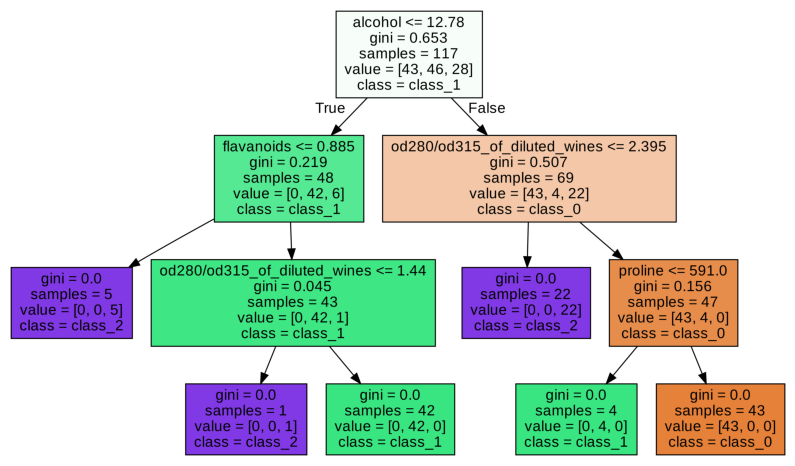

In [31]:
import matplotlib.pyplot as plt
plt.figure(figsize = (14, 18))
plt.imshow(plt.imread('wine_tree.png'))
plt.axis('off')
plt.show()